## Sentiment Analysis on Reviews

In [45]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [4]:
# Read Data
df = pd.read_csv('data/Reviews.csv')

In [5]:
# Check the data
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# Display number of entries and attributes to data
df.shape

(568454, 10)

In [7]:
# Refine analysis to only 1000 entries
df = df.head(1000)
df.shape

(1000, 10)

## Quick EDA

<Axes: title={'center': 'Reviews by Score'}, xlabel='Score', ylabel='Number of Reviews'>

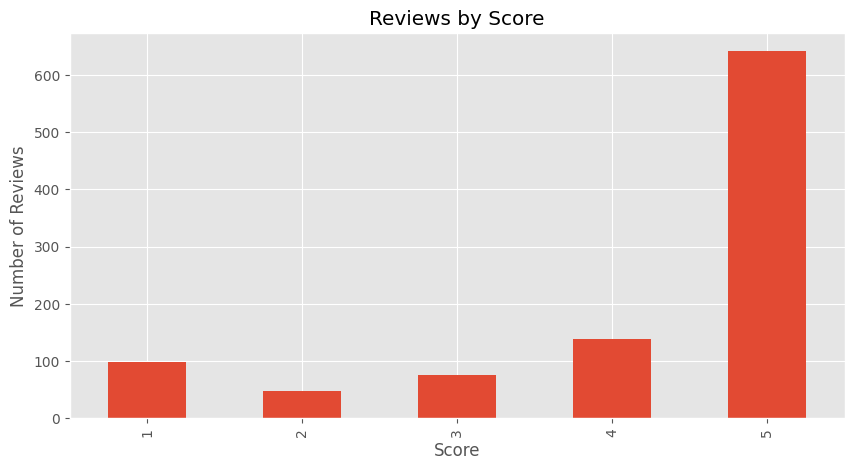

In [8]:
df['Score'].value_counts().sort_index() \
    .plot(kind= 'bar', 
          title= 'Reviews by Score', 
          ylabel= 'Number of Reviews', 
          figsize=(10, 5))

## Basic NLTK

In [9]:
output = df['Text'][50]
print(output)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
# Split sentence into english tokens/words
nltk.word_tokenize(output)


['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [11]:
# Focus on first 10 words
tokens = nltk.word_tokenize(output)
print(tokens[:10])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [12]:
# Separate by Part of Speech (POS) - https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [13]:
# Turn tagged words into chuncks
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER (Valence Aware Dictionary and Sentiment Reasoner) Sentiment Scoring 

Stop words are removed and each word is scored and combined to receive a total score. Does not account for relationship between words.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('I hate this game!')

{'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6114}

In [17]:
sia.polarity_scores(output)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [18]:
# Run polarity score through the data set
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] =sia.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
print(vaders)

       Id    neg    neu    pos  compound   ProductId          UserId  \
0       1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1       2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2       3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3       4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4       5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   
..    ...    ...    ...    ...       ...         ...             ...   
995   996  0.026  0.721  0.253    0.9788  B006F2NYI2  A1D3F6UI1RTXO0   
996   997  0.000  0.786  0.214    0.9309  B006F2NYI2   AF50D40Y85TV3   
997   998  0.000  0.673  0.327    0.9634  B006F2NYI2  A3G313KLWDG3PW   
998   999  0.063  0.874  0.062   -0.0129  B006F2NYI2  A3NIDDT7E7JIFW   
999  1000  0.027  0.939  0.034   -0.1027  B006F2NYI2  A132DJVI37RB4X   

                         ProfileName  HelpfulnessNumerator  \
0                         delmartian                     1   
1          

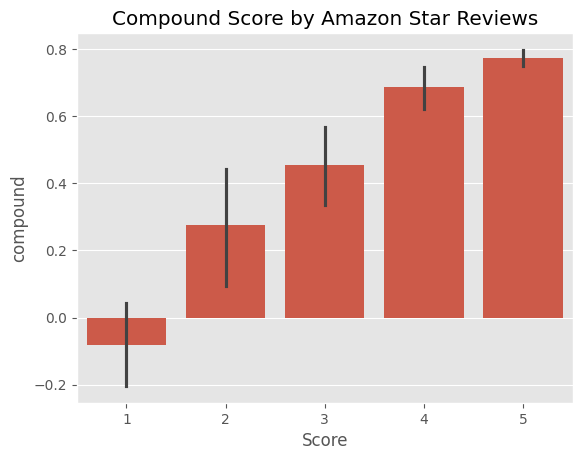

In [51]:
compound_plot = sb.barplot(data=vaders, x='Score', y='compound').set_title("Compound Score by Amazon Star Reviews")
plt.show()

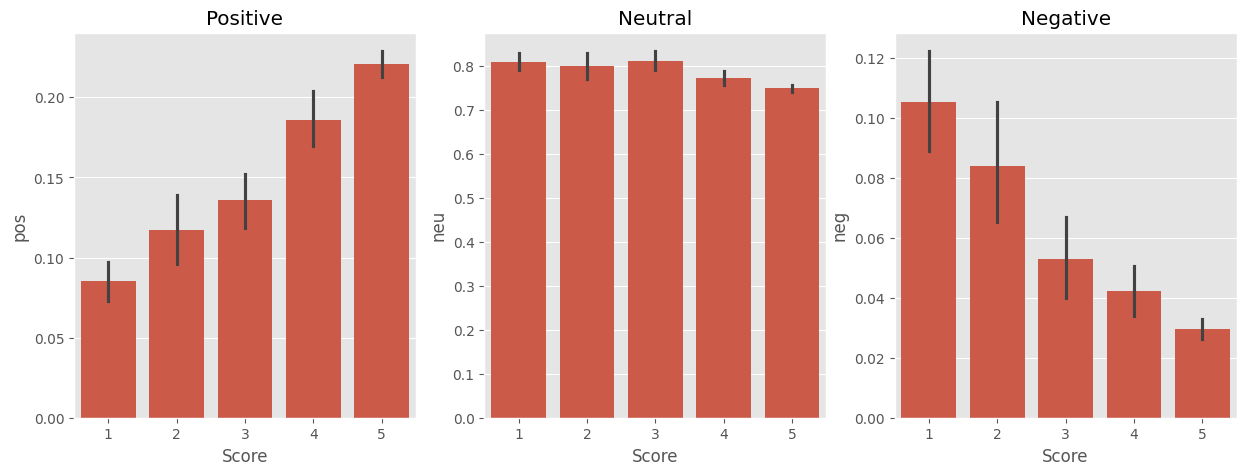

In [50]:
fig, axs = plt.subplots(1, 3, figsize= (15,5))
sb.barplot(data=vaders, x='Score', y='pos', ax= axs[0]).set_title('Positive')
sb.barplot(data=vaders, x='Score', y='neu', ax= axs[1]).set_title('Neutral')
sb.barplot(data=vaders, x='Score', y='neg', ax= axs[2]).set_title('Negative')
plt.show()